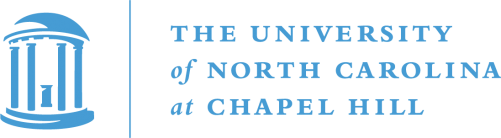


# Notebook 10
**Course:** *Econ 590, Computational Methods for Economists*, [University of North Carolina at Chapel Hill](https://econ.unc.edu/), Spring 2025  
**Instructor:** [Marlon Azinovic-Yang](https://sites.google.com/view/marlonazinovic/home)  
**Contact:** marlonay@unc.edu  
**References:** This notebook has benefited greatly from the teaching material and notebooks generously made available by [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home), [Felix Kubler](https://sites.google.com/site/fkubler/), [Harold Linh Cole](https://economics.sas.upenn.edu/people/harold-l-cole), [Jeremy Greenwood](https://www.jeremygreenwood.net/), [Jeppe Druedahl](https://sites.google.com/view/jeppe-druedahl/), [Rick Evans](https://sites.google.com/site/rickecon/), and by [Tom Sargent](http://www.tomsargent.com/) and [John Stachurski](https://johnstachurski.net/) on [QuantEcon](https://quantecon.org/).

# Content
The goal of this notebook is to introduce interpolation methods in Python. 

We will use the function `interp1d` and `BarycentricInterpolator` from the `scipy.interpolate` module.


In [1]:
import numpy as np # for vectors and arrays
import matplotlib.pyplot as plt # for plotting
from scipy.interpolate import interp1d, BarycentricInterpolator # for interpolating


## Piecewise linear interpolation
The idea of piecewise linear interpolation is to approximate a function $f(x)$ for continuous inputs $x$, based on knowing the function values for a set of so called interpolation nodes. We beed to have interpolation nodes $[x_0, x_1, \dots, x_{N-1}]$ with known function values $[f_0, f_1, \dots, f_{N-1}]$, and then we approximate the function linearly inbetween those points. To do this with Python, we can use the command `interp1d(xnodes, ynodes, kind="linear")` to create a function that linearly interpolates, given two arrays `xnodes` and `ynodes`.

In [2]:
# Example

# say we know x and f(x) at 4 points
xnodes = np.array([-3, -1, 1, 3])
ynodes = np.array([9, 1, 1, 9])

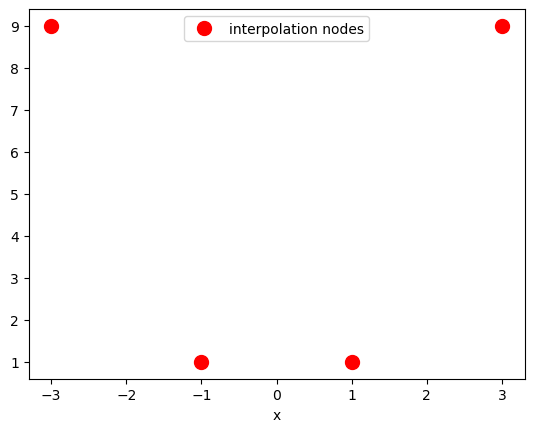

In [3]:
# let's plot it
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()


In [4]:
# now we want to create a function that interpolates linearly inbetween
finterpolate = interp1d(xnodes, ynodes, kind = "linear")

In [5]:
# let's try the function
print("finterpolate(-3) = ", finterpolate(-3))
print("finterpolate(-1) = ", finterpolate(-1))

finterpolate(-3) =  9.0
finterpolate(-1) =  1.0


In [6]:
# but importantly, we can now also use inputs not directly on the nodes
print("finterpolate(-2.0) = ", finterpolate(-3.0))
print("finterpolate(-2.1) = ", finterpolate(-2.1))
print("finterpolate(-2.99) = ", finterpolate(-2.99))

finterpolate(-2.0) =  9.0
finterpolate(-2.1) =  5.4
finterpolate(-2.99) =  8.96


In [7]:
# let's try to plot it for many points
xplot = np.linspace(-3.0, 3.0, 1000)
print("xplot = ", xplot)


xplot =  [-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.513

In [8]:
print("finterpolate(xplot) = ", finterpolate(xplot))

finterpolate(xplot) =  [9.         8.97597598 8.95195195 8.92792793 8.9039039  8.87987988
 8.85585586 8.83183183 8.80780781 8.78378378 8.75975976 8.73573574
 8.71171171 8.68768769 8.66366366 8.63963964 8.61561562 8.59159159
 8.56756757 8.54354354 8.51951952 8.4954955  8.47147147 8.44744745
 8.42342342 8.3993994  8.37537538 8.35135135 8.32732733 8.3033033
 8.27927928 8.25525526 8.23123123 8.20720721 8.18318318 8.15915916
 8.13513514 8.11111111 8.08708709 8.06306306 8.03903904 8.01501502
 7.99099099 7.96696697 7.94294294 7.91891892 7.89489489 7.87087087
 7.84684685 7.82282282 7.7987988  7.77477477 7.75075075 7.72672673
 7.7027027  7.67867868 7.65465465 7.63063063 7.60660661 7.58258258
 7.55855856 7.53453453 7.51051051 7.48648649 7.46246246 7.43843844
 7.41441441 7.39039039 7.36636637 7.34234234 7.31831832 7.29429429
 7.27027027 7.24624625 7.22222222 7.1981982  7.17417417 7.15015015
 7.12612613 7.1021021  7.07807808 7.05405405 7.03003003 7.00600601
 6.98198198 6.95795796 6.93393393 6.9099

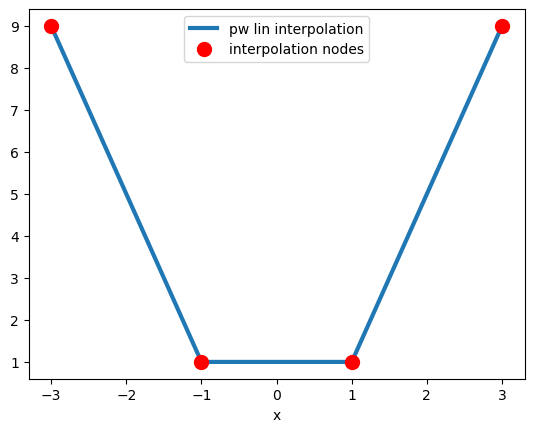

In [9]:

# let's plot it
plt.plot(xplot, finterpolate(xplot), linewidth = 3, label = "pw lin interpolation")
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()

### Exercise 1:
Create a function that linearly interpolates between the values `xnodes` and `ynodes`. Plot the data and the interpolating function for a grid of 1000 equally spaced points between -3 and 3. Where will the interpolation be more or less precise?

In [10]:
xnodes = np.array([-3, -2.5, -2.0, -1.4, -1, 1, 3])
ynodes = np.array([-0.14112001, -0.59847214, -0.90929743, -0.98544973, -0.84147098,
        0.84147098,  0.14112001])

In [11]:
# solution


## Cubic spline interpolation
The idea of interpolation with cubic spline is to approximate a function $f(x)$ for continuous inputs $x$, based on knowing the function values for a set of so called interpolation nodes. We beed to have interpolation nodes $[x_0, x_1, \dots, x_{N-1}]$ with known function values $[f_0, f_1, \dots, f_{N-1}]$, and then we approximate the function inbetween those points with a polynomial of degree 3, such that the resulting approximator as well its first two derivatives are continuous. To do this with Python, we can use the command `interp1d(xnodes, ynodes, kind="cubic")` to create a function that linearly interpolates, given two arrays `xnodes` and `ynodes`.

In [12]:
# Example

# say we know x and f(x) at 4 points
xnodes = np.array([-3, -1, 1, 3])
ynodes = np.array([9, 1, 1, 9])

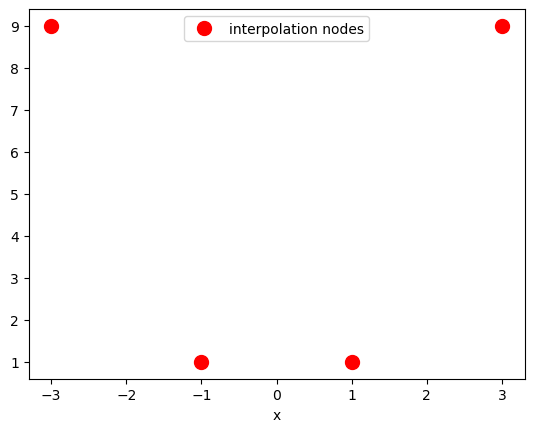

In [13]:
# let's plot it
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()

In [14]:
# now we want to create a function that does interpolation with cubic splines
finterpolate = interp1d(xnodes, ynodes, kind = "cubic")

In [15]:
# let's try the function
print("finterpolate(-3) = ", finterpolate(-3))
print("finterpolate(-1) = ", finterpolate(-1))

finterpolate(-3) =  9.0
finterpolate(-1) =  1.0000000000000002


In [16]:
# but importantly, we can now also use inputs not directly on the nodes
print("finterpolate(-2.0) = ", finterpolate(-3.0))
print("finterpolate(-2.1) = ", finterpolate(-2.1))
print("finterpolate(-2.99) = ", finterpolate(-2.99))

finterpolate(-2.0) =  9.0
finterpolate(-2.1) =  4.409999999999998
finterpolate(-2.99) =  8.940100000000003


In [17]:
# let's try to plot it for many points
xplot = np.linspace(-3.0, 3.0, 1000)
print("xplot = ", xplot)

xplot =  [-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.513

In [18]:
print("finterpolate(xplot) = ", finterpolate(xplot))

finterpolate(xplot) =  [9.00000000e+00 8.96400004e+00 8.92807222e+00 8.89221654e+00
 8.85643301e+00 8.82072162e+00 8.78508238e+00 8.74951528e+00
 8.71402033e+00 8.67859752e+00 8.64324685e+00 8.60796833e+00
 8.57276195e+00 8.53762772e+00 8.50256563e+00 8.46757568e+00
 8.43265788e+00 8.39781223e+00 8.36303871e+00 8.32833735e+00
 8.29370812e+00 8.25915104e+00 8.22466611e+00 8.19025332e+00
 8.15591267e+00 8.12164417e+00 8.08744781e+00 8.05332359e+00
 8.01927152e+00 7.98529160e+00 7.95138382e+00 7.91754818e+00
 7.88378469e+00 7.85009334e+00 7.81647413e+00 7.78292707e+00
 7.74945215e+00 7.71604938e+00 7.68271875e+00 7.64946027e+00
 7.61627393e+00 7.58315974e+00 7.55011769e+00 7.51714778e+00
 7.48425002e+00 7.45142440e+00 7.41867092e+00 7.38598959e+00
 7.35338041e+00 7.32084337e+00 7.28837847e+00 7.25598572e+00
 7.22366511e+00 7.19141664e+00 7.15924032e+00 7.12713615e+00
 7.09510411e+00 7.06314423e+00 7.03125648e+00 6.99944088e+00
 6.96769743e+00 6.93602612e+00 6.90442695e+00 6.87289993e+00
 

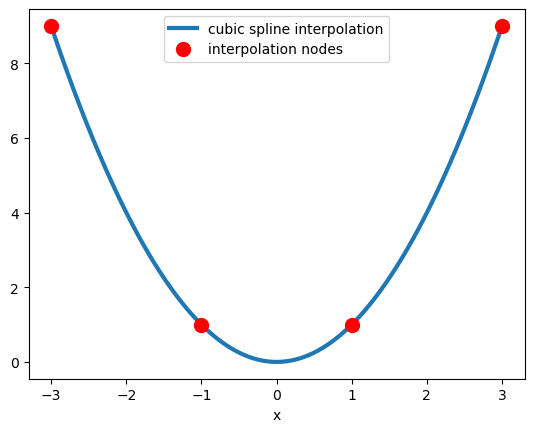

In [19]:

# let's plot it
plt.plot(xplot, finterpolate(xplot), linewidth = 3, label = "cubic spline interpolation")
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()

### Exercise 2:
Create a function that interpolates between the values `xnodes` and `ynodes` using cubic splines. Plot the data and the interpolating function for a grid of 1000 equally spaced points between -3 and 3. Where will the interpolation be more or less precise?

In [20]:
xnodes = np.array([-3, -2.5, -2.0, -1.4, -1, 1, 3])
ynodes = np.array([-0.14112001, -0.59847214, -0.90929743, -0.98544973, -0.84147098,
        0.84147098,  0.14112001])

In [21]:
# solution


## Polynomial interpolation
The idea of polynomial interpolation is to approximate a function $f(x)$ for continuous inputs $x$, based on knowing the function values for a set of so called interpolation nodes. We beed to have interpolation nodes $[x_0, x_1, \dots, x_{N-1}]$ with known function values $[f_0, f_1, \dots, f_{N-1}]$, and then we approximate the function by a poynomial of degree $N - 1$. To do this with Python, we can use the command `BarycentricInterpolator(xnodes, ynodes)` to create a function that linearly interpolates, given two arrays `xnodes` and `ynodes`.

In [22]:
# Example

# say we know x and f(x) at 4 points
xnodes = np.array([-3, -1, 1, 3])
ynodes = np.array([9, 1, 1, 9])

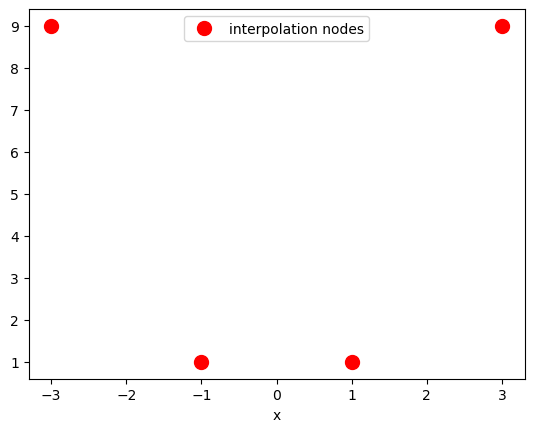

In [23]:
# let's plot it
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()

In [24]:
# now we want to create a function that does interpolation a global polynomial of degree 3 (because we have 4 points)
finterpolate = BarycentricInterpolator(xnodes, ynodes)

In [25]:
# let's try the function
print("finterpolate(-3) = ", finterpolate(-3))
print("finterpolate(-1) = ", finterpolate(-1))

finterpolate(-3) =  9.0
finterpolate(-1) =  1.0


In [26]:
# but importantly, we can now also use inputs not directly on the nodes
print("finterpolate(-2.0) = ", finterpolate(-3.0))
print("finterpolate(-2.1) = ", finterpolate(-2.1))
print("finterpolate(-2.99) = ", finterpolate(-2.99))

finterpolate(-2.0) =  9.0
finterpolate(-2.1) =  4.410000000000001
finterpolate(-2.99) =  8.940100000000001


In [27]:
# let's try to plot it for many points
xplot = np.linspace(-3.0, 3.0, 1000)
print("xplot = ", xplot)

xplot =  [-3.         -2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997
 -2.96396396 -2.95795796 -2.95195195 -2.94594595 -2.93993994 -2.93393393
 -2.92792793 -2.92192192 -2.91591592 -2.90990991 -2.9039039  -2.8978979
 -2.89189189 -2.88588589 -2.87987988 -2.87387387 -2.86786787 -2.86186186
 -2.85585586 -2.84984985 -2.84384384 -2.83783784 -2.83183183 -2.82582583
 -2.81981982 -2.81381381 -2.80780781 -2.8018018  -2.7957958  -2.78978979
 -2.78378378 -2.77777778 -2.77177177 -2.76576577 -2.75975976 -2.75375375
 -2.74774775 -2.74174174 -2.73573574 -2.72972973 -2.72372372 -2.71771772
 -2.71171171 -2.70570571 -2.6996997  -2.69369369 -2.68768769 -2.68168168
 -2.67567568 -2.66966967 -2.66366366 -2.65765766 -2.65165165 -2.64564565
 -2.63963964 -2.63363363 -2.62762763 -2.62162162 -2.61561562 -2.60960961
 -2.6036036  -2.5975976  -2.59159159 -2.58558559 -2.57957958 -2.57357357
 -2.56756757 -2.56156156 -2.55555556 -2.54954955 -2.54354354 -2.53753754
 -2.53153153 -2.52552553 -2.51951952 -2.513

In [28]:
print("finterpolate(xplot) = ", finterpolate(xplot))

finterpolate(xplot) =  [9.00000000e+00 8.96400004e+00 8.92807222e+00 8.89221654e+00
 8.85643301e+00 8.82072162e+00 8.78508238e+00 8.74951528e+00
 8.71402033e+00 8.67859752e+00 8.64324685e+00 8.60796833e+00
 8.57276195e+00 8.53762772e+00 8.50256563e+00 8.46757568e+00
 8.43265788e+00 8.39781223e+00 8.36303871e+00 8.32833735e+00
 8.29370812e+00 8.25915104e+00 8.22466611e+00 8.19025332e+00
 8.15591267e+00 8.12164417e+00 8.08744781e+00 8.05332359e+00
 8.01927152e+00 7.98529160e+00 7.95138382e+00 7.91754818e+00
 7.88378469e+00 7.85009334e+00 7.81647413e+00 7.78292707e+00
 7.74945215e+00 7.71604938e+00 7.68271875e+00 7.64946027e+00
 7.61627393e+00 7.58315974e+00 7.55011769e+00 7.51714778e+00
 7.48425002e+00 7.45142440e+00 7.41867092e+00 7.38598959e+00
 7.35338041e+00 7.32084337e+00 7.28837847e+00 7.25598572e+00
 7.22366511e+00 7.19141664e+00 7.15924032e+00 7.12713615e+00
 7.09510411e+00 7.06314423e+00 7.03125648e+00 6.99944088e+00
 6.96769743e+00 6.93602612e+00 6.90442695e+00 6.87289993e+00
 

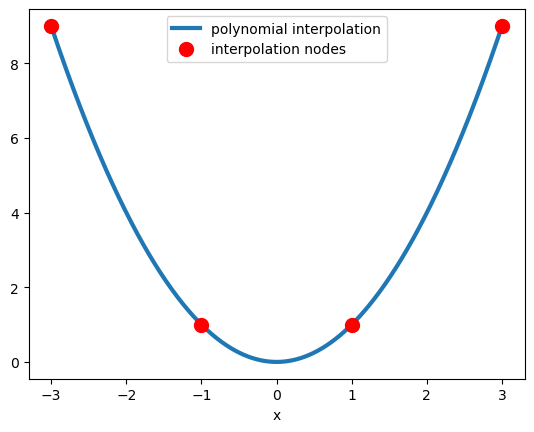

In [29]:

# let's plot it
plt.plot(xplot, finterpolate(xplot), linewidth = 3, label = "polynomial interpolation")
plt.plot(xnodes, ynodes, color = "r", marker = "o", markersize = 10, linestyle = "", label = "interpolation nodes")
plt.xlabel("x")
plt.legend()
plt.show()

### Exercise 3:
Create a function that interpolates between the values `xnodes` and `ynodes` using a global polynomial. Plot the data and the interpolating function for a grid of 1000 equally spaced points between -3 and 3. Where will the interpolation be more or less precise?

In [30]:
xnodes = np.array([-3, -2.5, -2.0, -1.4, -1, 1, 3])
ynodes = np.array([-0.14112001, -0.59847214, -0.90929743, -0.98544973, -0.84147098,
        0.84147098,  0.14112001])

In [31]:
# solution


### Exercise 4:
Compare all three approximation methods in a single plot. Graph the approximation error for all three methods assuming the true function is $f(x) = sin(x)$. 

In [32]:
xnodes = np.array([-3, -2.5, -2.0, -1.4, -1, 1, 3])
ynodes = np.array([-0.14112001, -0.59847214, -0.90929743, -0.98544973, -0.84147098,
        0.84147098,  0.14112001])

In [33]:
# solution


In [34]:
# solution



In [35]:
# solution